# <u>CAR PRICE PREDICTION</u>

## Import Dependencies

In [1]:
import pandas as pd
import numpy as np

## Import Data

In [2]:
data = pd.read_csv('Dataset/Car Price.csv')

## Process & Analyze Data

### Get first 5 rows

In [6]:
data.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


### Get info


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 non-null   object
 2   Year           4340 non-null   int64 
 3   Selling_Price  4340 non-null   int64 
 4   KM_Driven      4340 non-null   int64 
 5   Fuel           4340 non-null   object
 6   Seller_Type    4340 non-null   object
 7   Transmission   4340 non-null   object
 8   Owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


### Get summary statistics

In [9]:
data.describe()

,Year,Selling_Price,KM_Driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


### Get category wise count of values

In [10]:
data['Brand'].value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: Brand, dtype: int64

In [11]:
data['Model'].value_counts()

Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: Model, Length: 1491, dtype: int64

In [12]:
data['Fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: Fuel, dtype: int64

In [13]:
data['Seller_Type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: Seller_Type, dtype: int64

In [14]:
data['Transmission'].value_counts()

Manual       3892
Automatic     448
Name: Transmission, dtype: int64

In [15]:
data['Owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: Owner, dtype: int64

### Get column names

In [16]:
data.columns

Index(['Brand', 'Model', 'Year', 'Selling_Price', 'KM_Driven', 'Fuel',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

### Get shape of data frame

In [17]:
data.shape

(4340, 9)

### Get encoding of categorical features

In [18]:
data.replace({'Fuel': {'Petrol': 0, 'Diesel': 1, 'CNG': 2, 'LPG': 3, 'Electric': 4}}, inplace = True)

In [21]:
data.replace({'Seller_Type': {'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2}}, inplace = True)

In [20]:
data.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace = True)

In [22]:
data.replace({'Owner': {'First Owner': 0, 'Second Owner': 1, 'Third Owner': 2, 'Fourth & Above Owner': 3, 'Test Drive Car': 4}}, inplace = True)

## Split Dataset

In [27]:
y = data['Selling_Price']

In [28]:
y.shape

(4340,)

In [33]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: Selling_Price, Length: 4340, dtype: int64

In [35]:
X = data.drop(['Brand', 'Model', 'Selling_Price'], axis = 1)

In [36]:
X.shape

(4340, 6)

In [37]:
X

,Year,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,2007,70000,0,0,0,0
1,2007,50000,0,0,0,0
2,2012,100000,1,0,0,0
3,2017,46000,0,0,0,0
4,2014,141000,1,0,0,1
...,...,...,...,...,...,...
4335,2014,80000,1,0,0,1
4336,2014,80000,1,0,0,1
4337,2009,83000,0,0,0,1
4338,2016,90000,1,0,0,0


## Train Test Split

In [38]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12529)

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3038, 6), (1302, 6), (3038,), (1302,))

## Train Model

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr = LinearRegression()

In [44]:
lr.fit(X_train, y_train)

LinearRegression()

## Model Prediction

In [45]:
y_pred = lr.predict(X_test)

In [46]:
y_pred.shape

(1302,)

In [47]:
y_pred

array([ 663987.72495022,  612821.75238635,  447816.59259403, ...,
        600340.9222407 , 1621764.7746308 ,  306581.83305018])

## Model Evaluation

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [51]:
mean_squared_error(y_test, y_pred)

173030324026.74896

In [52]:
mean_absolute_error(y_test, y_pred)

232030.03231825595

In [53]:
r2_score(y_test, y_pred)

0.46881434078169193

## Visualization of Actual vs Predicted Results

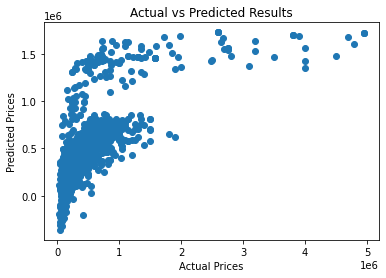

In [56]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Results')
plt.show()

## Get Future Predictions

In [108]:
data_new = data.sample()

In [109]:
data_new

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
1515,Hyundai,Hyundai i20 1.4 CRDi Sportz,2012,450000,120000,1,0,0,1


In [110]:
data_new.shape

(1, 9)

In [111]:
X_new = data_new.drop(['Brand', 'Model', 'Selling_Price'], axis = 1)

In [112]:
y_pred_new = lr.predict(X_new)

In [113]:
y_pred_new

array([408654.4860315])